In [2]:
#https://pub.towardsai.net/survival-analysis-with-python-tutorial-how-what-when-and-why-19a5cfb3c312

In [ ]:
#https://medium.com/analytics-vidhya/log-rank-test-kaplan-meier-survival-curve-python-code-3fc78da644d5

# Kaplan Meier Analysis

In [3]:
#http://www.sthda.com/english/wiki/cox-proportional-hazards-model 

In [7]:
#conda install -c conda-forge lifelines

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [9]:
temp = pd.read_csv("H_Ant_Log1.csv")

In [11]:
temp

,ID,Trial,Date,Wind,Collector,Time point,Temp,Cloud cover (%),Colony,Dish,Time,Vetch,Oat,Sunhemp,Wheatgrass,Radish,Fescue
0,1,1,2/23/2020,32,Elliott,0.0,78,89,117,1,2:09:00 PM,0.0,0.0,0.0,0.0,0.0,NaN
1,2,1,2/23/2020,32,Elliott,0.0,78,89,119,2,2:15:00 PM,0.0,0.0,0.0,0.0,0.0,NaN
2,3,1,2/23/2020,32,Elliott,0.0,78,89,121,3,2:22:00 PM,0.0,0.0,0.0,0.0,0.0,NaN
3,4,1,2/23/2020,32,Elliott,0.0,78,89,122,4,2:26:00 PM,0.0,0.0,0.0,0.0,0.0,NaN
4,5,1,2/23/2020,32,Elliott,0.0,78,89,131,5,2:30:00 PM,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,9,6/10/2020,9,Elliott,24.0,91,10,35,4,8:54:00 AM,8.0,10.0,7.0,10.0,10.0,10.0
396,397,9,6/10/2020,9,Elliott,24.0,91,10,36,5,8:57:00 AM,10.0,10.0,10.0,10.0,10.0,10.0
397,398,9,6/10/2020,9,Elliott,24.0,91,10,37,6,9:00:00 AM,10.0,10.0,10.0,10.0,10.0,10.0
398,399,9,6/10/2020,9,Elliott,24.0,91,10,40,7,9:04:00 AM,10.0,10.0,10.0,10.0,10.0,6.0


In [12]:
ant = temp.dropna()

In [13]:
ant.head()

,ID,Trial,Date,Wind,Collector,Time point,Temp,Cloud cover (%),Colony,Dish,Time,Vetch,Oat,Sunhemp,Wheatgrass,Radish,Fescue
90,91,3,3/11/2020,11,Noval & Elliott,0.0,88,86,54,1,2:48:00 PM,0.0,0.0,0.0,0.0,0.0,0.0
91,92,3,3/11/2020,11,Noval & Elliott,0.0,88,86,53,2,2:53:00 PM,0.0,0.0,0.0,0.0,0.0,0.0
92,93,3,3/11/2020,11,Noval & Elliott,0.0,88,86,85,3,3:04:00 PM,0.0,0.0,0.0,0.0,0.0,0.0
93,94,3,3/11/2020,11,Noval & Elliott,0.0,88,86,77,4,3:10:00 PM,0.0,0.0,0.0,0.0,0.0,0.0
94,95,3,3/11/2020,11,Noval & Elliott,0.0,88,86,76,5,3:14:00 PM,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
ant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 90 to 399
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               309 non-null    int64  
 1   Trial            309 non-null    int64  
 2   Date             309 non-null    object 
 3   Wind             309 non-null    int64  
 4   Collector        309 non-null    object 
 5   Time point       309 non-null    float64
 6   Temp             309 non-null    int64  
 7   Cloud cover (%)  309 non-null    int64  
 8   Colony           309 non-null    int64  
 9   Dish             309 non-null    int64  
 10  Time             309 non-null    object 
 11  Vetch            309 non-null    float64
 12  Oat              309 non-null    float64
 13  Sunhemp          309 non-null    float64
 14  Wheatgrass       309 non-null    float64
 15  Radish           309 non-null    float64
 16  Fescue           309 non-null    float64
dtypes: float64(7), 

In [27]:
kmf_r = KaplanMeierFitter()
kmf_v = KaplanMeierFitter()
kmf_w = KaplanMeierFitter()
kmf_s = KaplanMeierFitter()
kmf_o = KaplanMeierFitter()
kmf_f = KaplanMeierFitter()

In [28]:
radish = (ant['Radish'])
vetch = (ant['Vetch'])
wheatgrass = (ant['Wheatgrass'])
sunhemp = (ant['Sunhemp'])
oat = (ant['Oat'])
fescue = (ant['Fescue'])
time = (ant['Time point'])

In [17]:
r = ant.groupby(time)['Radish'].mean()

In [29]:
ant.loc[radish == 10, 'dead'] = 1
ant.loc[radish != 10, 'dead'] = 0
ant.loc[vetch == 10, 'dead_v'] = 1
ant.loc[vetch != 10, 'dead_v'] = 0
ant.loc[wheatgrass == 10, 'dead_w'] = 1
ant.loc[wheatgrass != 10, 'dead_w'] = 0
ant.loc[sunhemp == 10, 'dead_s'] = 1
ant.loc[sunhemp != 10, 'dead_s'] = 0
ant.loc[oat == 10, 'dead_o'] = 1
ant.loc[oat != 10, 'dead_o'] = 0
ant.loc[fescue == 10, 'dead_f'] = 1
ant.loc[fescue != 10, 'dead_f'] = 0
ant.head()

C:\Users\Choudhury_Lab\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Choudhury_Lab\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Choudhury_Lab\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,ID,Trial,Date,Wind,Collector,Time point,Temp,Cloud cover (%),Colony,Dish,...,Sunhemp,Wheatgrass,Radish,Fescue,dead,dead_v,dead_w,dead_s,dead_o,dead_f
90,91,3,3/11/2020,11,Noval & Elliott,0.0,88,86,54,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,92,3,3/11/2020,11,Noval & Elliott,0.0,88,86,53,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,3,3/11/2020,11,Noval & Elliott,0.0,88,86,85,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,94,3,3/11/2020,11,Noval & Elliott,0.0,88,86,77,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,95,3,3/11/2020,11,Noval & Elliott,0.0,88,86,76,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
kmf_r.fit(durations = ant['Time point'], event_observed = ant['dead'])
kmf_v.fit(durations = ant['Time point'], event_observed = ant['dead_v'])
kmf_w.fit(durations = ant['Time point'], event_observed = ant['dead_w'])
kmf_s.fit(durations = ant['Time point'], event_observed = ant['dead_s'])
kmf_o.fit(durations = ant['Time point'], event_observed = ant['dead_o'])
kmf_f.fit(durations = ant['Time point'], event_observed = ant['dead_f'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 309 total observations, 229 right-censored observations>

In [32]:
kmf_r.event_table
kmf_v.event_table
kmf_w.event_table
kmf_s.event_table
kmf_o.event_table
kmf_f.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,62,0,62,309,309
1.0,62,5,57,0,247
2.0,62,17,45,0,185
4.0,62,22,40,0,123
24.0,61,36,25,0,61


In [21]:
event_0 = kmf_r.event_table.iloc[0,:]

surv_for_0 = (event_0.at_risk - event_0.observed)/event_0.at_risk

surv_for_0

1.0

In [22]:
event_1 = kmf_r.event_table.iloc[1,:]

surv_for_1 = (event_1.at_risk - event_1.observed)/event_1.at_risk

surv_for_1

0.9757085020242915

In [23]:
event_4 = kmf_r.event_table.iloc[4,:]

surv_for_4 = (event_4.at_risk - event_4.observed)/event_4.at_risk

surv_for_4

0.32786885245901637

In [24]:
kmf_r.predict([0,1,2,4,24])

0     1.000000
1     0.975709
2     0.912419
4     0.749222
24    0.245647
Name: KM_estimate, dtype: float64

In [25]:
kmf_v.predict([0,1,2,4,24])

0     1.000000
1     1.000000
2     1.000000
4     0.991870
24    0.747967
Name: KM_estimate, dtype: float64

<Figure size 72x72 with 0 Axes>

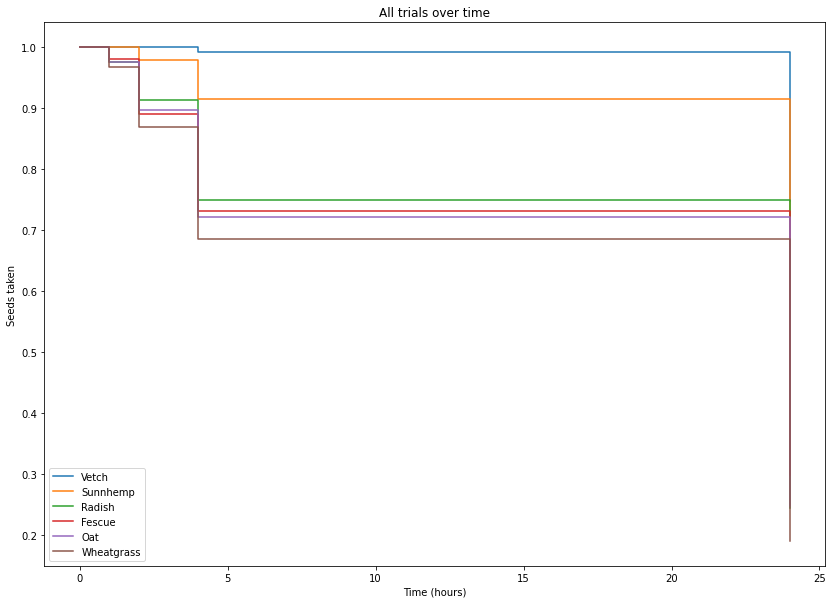

In [74]:
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(10)

kmf_v.plot(ci_show = False, label = 'Vetch')
kmf_s.plot(ci_show = False, label = 'Sunnhemp')
kmf_r.plot(ci_show = False, label = 'Radish')
kmf_f.plot(ci_show = False, label = 'Fescue')
kmf_o.plot(ci_show = False, label = 'Oat')
kmf_w.plot(ci_show = False, label = 'Wheatgrass')

plt.title("All trials over time")
plt.xlabel('Time (hours)')
plt.ylabel('Seeds taken')

plt.legend()

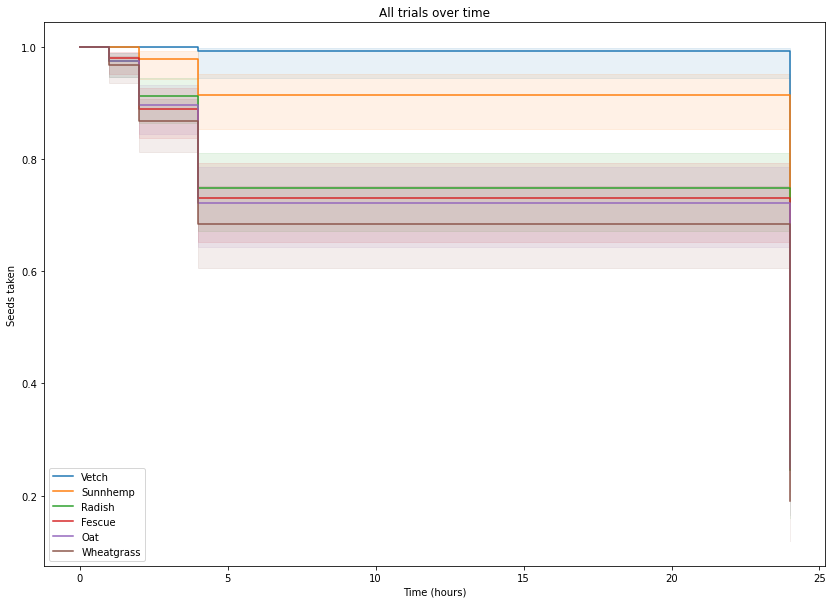

In [75]:
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(10)

kmf_v.plot(ci_show = True, ci_alpha = 0.1, label = 'Vetch')
kmf_s.plot(ci_show = True, ci_alpha = 0.1, label = 'Sunnhemp')
kmf_r.plot(ci_show = True, ci_alpha = 0.1, label = 'Radish')
kmf_f.plot(ci_show = True, ci_alpha = 0.1, label = 'Fescue')
kmf_o.plot(ci_show = True, ci_alpha = 0.1, label = 'Oat')
kmf_w.plot(ci_show = True, ci_alpha = 0.1, label = 'Wheatgrass')

plt.title("All trials over time")
plt.xlabel('Time (hours)')
plt.ylabel('Seeds taken')

plt.legend()

In [85]:
time = ant['Time point']
event_r = ant['dead']

event_v = ant['dead_v']

event_w = ant['dead_w']

event_s = ant['dead_s']

event_o = ant['dead_o']

event_f = ant['dead_f']

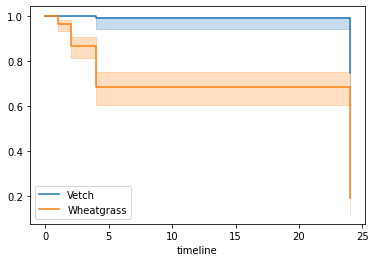

In [97]:

ax = plt.subplot(111)
ax = kmf_v.fit(time, event_v, label="Vetch").plot(ax=ax)
ax = kmf_w.fit(time, event_w, label="Wheatgrass").plot(ax=ax)

In [94]:
results=logrank_test(time, time, event_v, event_w)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          81.19 <0.005     62.08

In [95]:
print("P-value :",results.p_value) #I dont think this is correct at all, I'll try to run an analysis elsewhere to see 

P-value : 2.0532283851727126e-19


# Log Rank Test

This is a hypothesis test that is used to compare the survival distribution of two samples
- Goal: Our goal is to see if there is any significant difference between the groups being compared.

In [76]:
ant.head()

,ID,Trial,Date,Wind,Collector,Time point,Temp,Cloud cover (%),Colony,Dish,...,Sunhemp,Wheatgrass,Radish,Fescue,dead,dead_v,dead_w,dead_s,dead_o,dead_f
90,91,3,3/11/2020,11,Noval & Elliott,0.0,88,86,54,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,92,3,3/11/2020,11,Noval & Elliott,0.0,88,86,53,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,3,3/11/2020,11,Noval & Elliott,0.0,88,86,85,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,94,3,3/11/2020,11,Noval & Elliott,0.0,88,86,77,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,95,3,3/11/2020,11,Noval & Elliott,0.0,88,86,76,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
time = ant['Time point']
event_r = ant['dead']

event_v = ant['dead_v']

event_w = ant['dead_w']

event_s = ant['dead_s']

event_o = ant['dead_o']

event_f = ant['dead_f']

In [88]:
results=logrank_test(time, time, event_v, event_w)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          81.19 <0.005     62.08

In [89]:
print("P-value :",results.p_value) #this is very wrong, figure out issue and redo

P-value : 2.0532283851727126e-19
